In [1]:
# vh, cp = ("P2_NIK_2022-08-20_13-40-09.eeg/P2_NIK_2022-08-20_13-40-09.vhdr",
#           "/Users/neverix/Documents/code/py/image-event-related-potentials/data/134001_stim_cola_2022-08-20_13h39.53.146.csv")
vh, cp = ("P3_EUG_2022-08-20_14-24-02.eeg/P3_EUG_2022-08-20_14-24-02.vhdr",
           "data/135001_stim_cola_2022-08-20_14h23.45.214.csv")
# vh, cp = ("P4_SAS_2022-08-20_15-00-06.cnt/P4_SAS_2022-08-20_15-00-06.cnt",
#           "/Users/neverix/Documents/code/py/image-event-related-potentials/data/136001_stim_cola_2022-08-20_14h47.03.817.csv")

In [2]:
import mne.io
try:
    data = mne.io.read_raw_brainvision(vh)
except OSError:
    try:
        data = mne.io.read_raw_cnt(vh)
    except UnicodeDecodeError:
        print(":p")

Extracting parameters from P3_EUG_2022-08-20_14-24-02.eeg/P3_EUG_2022-08-20_14-24-02.vhdr...
Setting channel info structure...


<ipython-input-2-a6dd01461878>:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_brainvision(vh)


In [3]:
data = data.load_data().filter(0.1, 300)  # vars(data)

Reading 0 ... 151583  =      0.000 ...   148.030 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 3e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 300.00 Hz
- Upper transition bandwidth: 75.00 Hz (-6 dB cutoff frequency: 337.50 Hz)
- Filter length: 33793 samples (33.001 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.3s finished


In [4]:
data = data.drop_channels([e for i, e in enumerate(data.ch_names) if data._data[i, :].max() < 1e-16])

Using matplotlib as 2D backend.


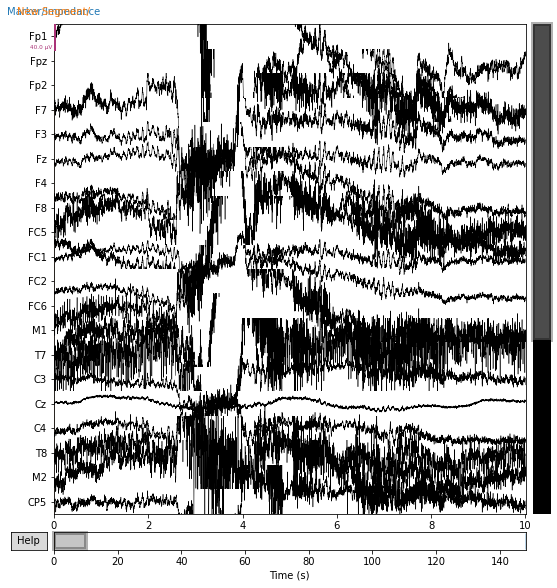

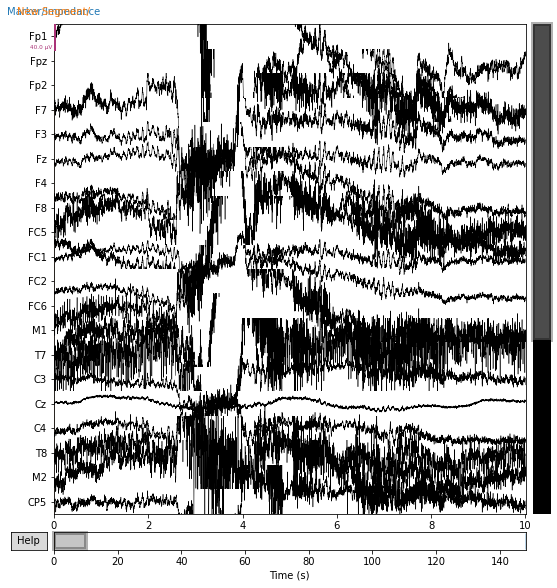

In [5]:
# %matplotlib inline
# # widget
import mne.viz
mne.viz.plot_raw(data)

In [6]:
# mne.preprocessing.bads._find_outliers(data.get_data())

In [7]:
ica = mne.preprocessing.ICA(n_components=10, max_iter="auto", random_state=32)
fit_data = ica.fit(data).apply(data)

Fitting ICA to data using 31 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 2.3s.
Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 0 ICA components
    Projecting back using 31 PCA components


In [8]:
# ica.plot_components()

In [9]:
# ica.plot_overlay(data)

In [10]:
import mne.preprocessing
cov = mne.compute_raw_covariance(data)
cov.data.shape

Using up to 740 segments
Number of samples used : 151700
[done]


(31, 31)

Effective window size : 2.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


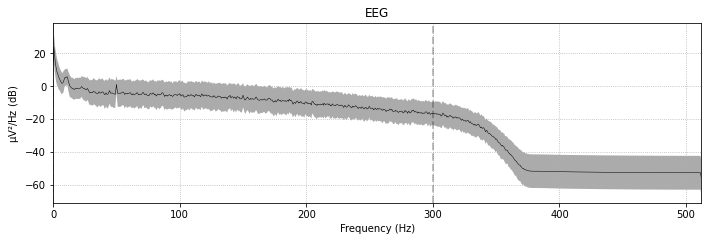

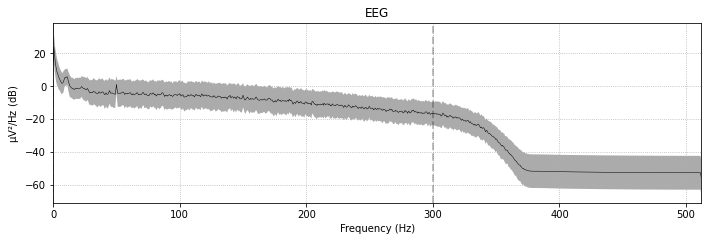

In [11]:
data.plot_psd(average=True)

In [12]:
import numpy as np
cl = 1e-3
data = data.apply_function(lambda x: np.clip(x, -cl, cl))

In [13]:
# vars(data)

In [14]:
# print(vars(data._annotations))

In [15]:
import pandas as pd
df = pd.read_csv(cp)
df = df[df.img.apply(lambda x: not isinstance(x, float))]
df

,img,trials_2.thisRepN,trials_2.thisTrialN,trials_2.thisN,trials_2.thisIndex,trials.thisRepN,trials.thisTrialN,trials.thisN,trials.thisIndex,text.started,...,text_4.started,text_3.started,key_resp_3.started,participant,session,date,expName,psychopyVersion,frameRate,Unnamed: 25
1,lays/lays1.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,...,NaN,NaN,NaN,135001.0,1.0,2022-08-20_14h23.45.214,stim_cola,2022.2.3,60.350895,NaN
2,lays/lays6.png,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,NaN,...,NaN,NaN,NaN,135001.0,1.0,2022-08-20_14h23.45.214,stim_cola,2022.2.3,60.350895,NaN
3,lays/lays5.png,0.0,0.0,0.0,0.0,0.0,2.0,2.0,6.0,NaN,...,NaN,NaN,NaN,135001.0,1.0,2022-08-20_14h23.45.214,stim_cola,2022.2.3,60.350895,NaN
4,lays/lays4.png,0.0,0.0,0.0,0.0,0.0,3.0,3.0,5.0,NaN,...,NaN,NaN,NaN,135001.0,1.0,2022-08-20_14h23.45.214,stim_cola,2022.2.3,60.350895,NaN
5,lays/lays7.png,0.0,0.0,0.0,0.0,0.0,4.0,4.0,8.0,NaN,...,NaN,NaN,NaN,135001.0,1.0,2022-08-20_14h23.45.214,stim_cola,2022.2.3,60.350895,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,lays/lays5.png,4.0,0.0,4.0,0.0,1.0,4.0,13.0,6.0,NaN,...,NaN,NaN,NaN,135001.0,1.0,2022-08-20_14h23.45.214,stim_cola,2022.2.3,60.350895,NaN
91,lays/lays2.png,4.0,0.0,4.0,0.0,1.0,5.0,14.0,3.0,NaN,...,NaN,NaN,NaN,135001.0,1.0,2022-08-20_14h23.45.214,stim_cola,2022.2.3,60.350895,NaN
92,lays/lays1.jpg,4.0,0.0,4.0,0.0,1.0,6.0,15.0,2.0,NaN,...,NaN,NaN,NaN,135001.0,1.0,2022-08-20_14h23.45.214,stim_cola,2022.2.3,60.350895,NaN
93,lays/lays4.png,4.0,0.0,4.0,0.0,1.0,7.0,16.0,5.0,NaN,...,NaN,NaN,NaN,135001.0,1.0,2022-08-20_14h23.45.214,stim_cola,2022.2.3,60.350895,NaN


In [16]:
import datetime
print(data.info)
print(data.times.max())
datetimes = [data.info["meas_date"] + datetime.timedelta(seconds=time) for time in data.times]

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fpz, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, M1, T7, ...
 chs: 31 EEG
 custom_ref_applied: False
 highpass: 0.1 Hz
 lowpass: 300.0 Hz
 meas_date: 2022-08-20 14:24:02 UTC
 nchan: 31
 projs: []
 sfreq: 1024.0 Hz
>
148.0302734375


In [17]:
df["image.started"]

1      35.472424
2      36.434999
3      37.437489
4      38.438833
5      39.439399
         ...    
90    150.433824
91    151.433630
92    152.415491
93    153.435709
94    154.416666
Name: image.started, Length: 90, dtype: float64

ayo
n


<ipython-input-22-d51ce1a3d886>:51: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


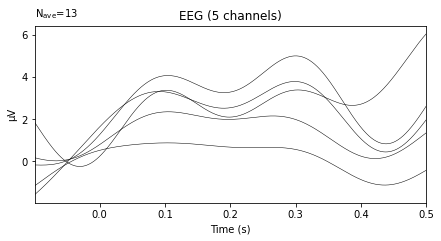

y
lays/lays1.jpg
n


<ipython-input-22-d51ce1a3d886>:51: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


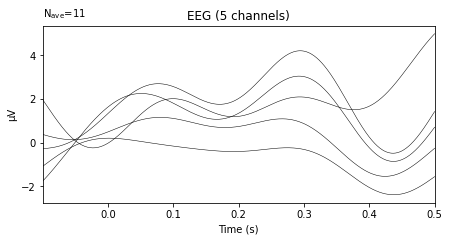

y


<ipython-input-22-d51ce1a3d886>:51: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


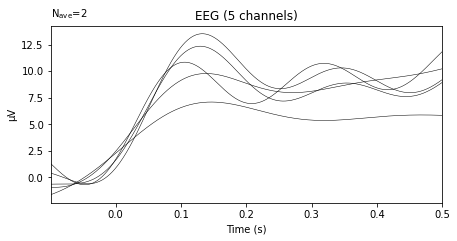

lays/lays2.png
n


<ipython-input-22-d51ce1a3d886>:51: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


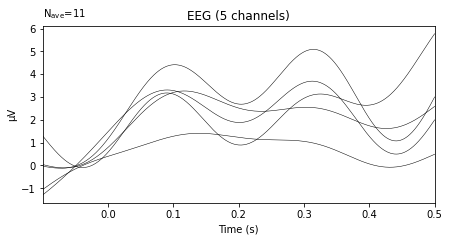

y


<ipython-input-22-d51ce1a3d886>:51: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


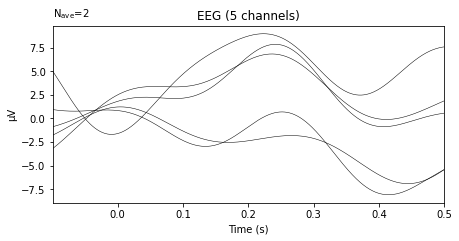

lays/lays3.png
n


<ipython-input-22-d51ce1a3d886>:51: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


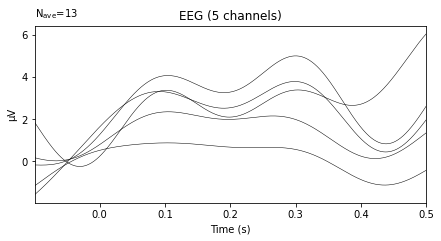

y
lays/lays4.png
n


<ipython-input-22-d51ce1a3d886>:51: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)
<ipython-input-22-d51ce1a3d886>:51: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


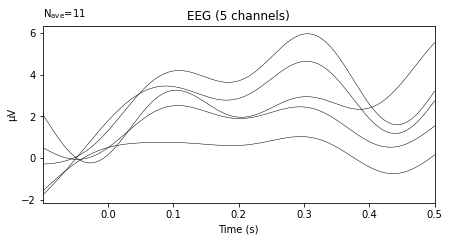

y


<ipython-input-22-d51ce1a3d886>:51: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


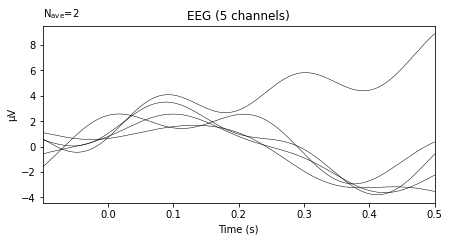

lays/lays5.png
n


<ipython-input-22-d51ce1a3d886>:51: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


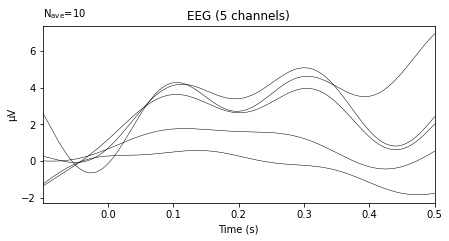

y


<ipython-input-22-d51ce1a3d886>:51: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


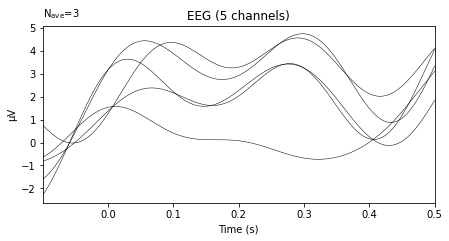

lays/lays6.png
n


<ipython-input-22-d51ce1a3d886>:51: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


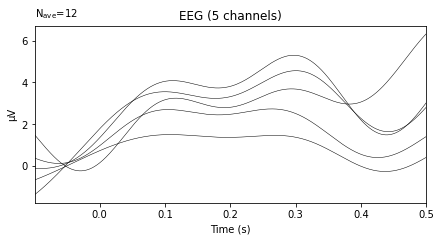

<ipython-input-22-d51ce1a3d886>:51: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


y


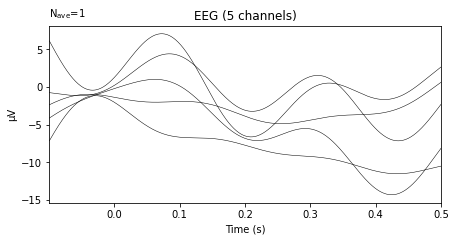

lays/lays7.png
n


<ipython-input-22-d51ce1a3d886>:51: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


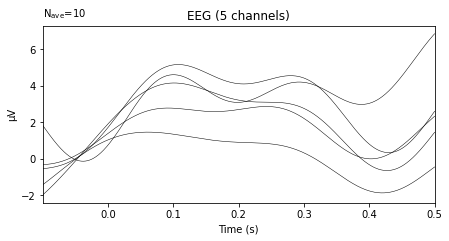

y


<ipython-input-22-d51ce1a3d886>:51: RuntimeWarning: filter_length (1691) is longer than the signal (615), distortion is likely. Reduce filter length or filter a longer signal.
  e = e.filter(0, 4)  # , filter_length=512)


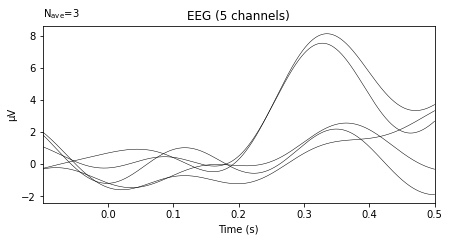

In [22]:
from matplotlib import pyplot as plt
import datetime
import random
import bisect
import pytz
mne.set_log_level(verbose=False)
tss = []
for pick_item in ["ayo"] + sorted(set(df["img"].tolist())):
    print(pick_item)
    ts = []
    for k in ("n", "y"):
        print(k)
        events = [pytz.UTC.localize(datetime.datetime.strptime(x + "000", "%Y-%m-%d_%Hh%M.%S.%f"))
                  + datetime.timedelta(seconds=float(y))
                  for _, x, y in (df
    #                               [df["key_resp.keys"] == k]
                                  [(df["img"] == pick_item if k == "y" else df["img"] != pick_item)]
                              [["date", "image.started"]].itertuples())
                                  if isinstance(x, str) and ("nan" not in str(y).lower())]
        events = [(min(len(datetimes) - 1, bisect.bisect_left(datetimes, e)
        #  + random.randrange(-100, 100) * 5
                                  ), 0, i) for i, e in enumerate(events)]
#         events = [(x + random.randrange(-10_000, 10_000), y, z) for x, y, z in events]
        #  + random.randrange(-100, 100)
        if not events:
            continue
        d = data.copy()  # .filter(1, 4)   # .filter(0, 50)  #  .filter(1, 300)
        d.set_eeg_reference("average")
#         mne.viz.plot_raw(d)
#         print(events)
        d = d.drop_channels([d.ch_names[(d.get_data() ** 2).mean(axis=-1).mean(axis=0).argmax()]])  # e = e.filter(0, 6).decimate(64)
        epoched = mne.Epochs(d,
                             events,
                             reject=dict(eeg=1e-4),
#                              reject=dict(eeg=2e-4),
#                              baseline=(0, 0),
#                              event_repeated="drop",  # "merge",
                             tmin=-0.1, tmax=0.5
                            )
#         mne.viz.plot_epochs(epoched)
        e = epoched.load_data().pick_channels("P4 P7 Pz O1 O2 Oz".split())
#         e = mne.set_eeg_reference(epoched.load_data())[0]  # .pick_channels("P4 P7 Pz O1 O2 Oz".split())
    #     e = mne.set_eeg_reference(epoched.load_data())[0]  # .pick_channels("P4 P7 Pz O1 O2 Oz".split())
#         keep = []
#         for i, t in enumerate(e):
#             keep.append(i)
#             e.info["bads"].append(i)
#         epoched
#         print(e)
        try:
            e = e.filter(0, 4)  # , filter_length=512)
            ts.append(e.average())
            e.average().plot()
        except (ZeroDivisionError, ValueError):
            continue
#         print(e.drop_bad())
#     break
    if len(ts) == 2:
        tss.append((pick_item, (ts[1]._data - ts[0]._data).T, ts[1].ch_names))

lays/lays1.jpg
lays/lays2.png
lays/lays4.png
lays/lays5.png
lays/lays6.png
lays/lays7.png


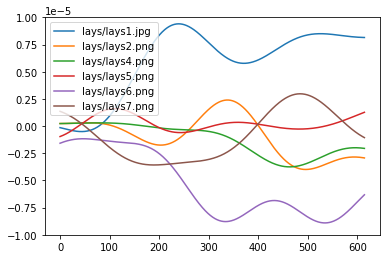

In [29]:
for name, x, leg in tss:
    print(name)
    plt.ylim([-1e-5, 1e-5])
    plt.plot(x.mean(axis=-1), label=name)
#     for y, l in zip(x.T, leg):
#         plt.plot(y, label=l)
#     plt.legend()
#     plt.show()
plt.legend()
plt.savefig("p300eug.svg")
plt.show()

In [30]:
!open p300eug.svg

In [20]:
e.info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])